In [1]:
import pandas as pd
import yfinance as yf
import datetime, time
import plotly.graph_objects as go

In [ ]:
import requests, random

chrome_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.86 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.111 Safari/537.36"
]

firefox_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0",
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0"
]

safari_agents = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Safari/605.1.15",
    "Mozilla/5.0 (iPhone; CPU iPhone OS 17_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Mobile/15E148 Safari/604.1"
]

edge_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.70 Safari/537.36 Edg/122.0.2365.80",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.6312.105 Safari/537.36 Edg/123.0.2420.53"
]

USER_AGENTS = {
    "chrome": chrome_agents,
    "firefox": firefox_agents,
    "safari": safari_agents,
    "edge": edge_agents
}

session = requests.Session()
session.headers.update({
    "User-Agent": random.choice(random.choice(list(USER_AGENTS.values())))
})

Welcome to the Salisbury Street Capital Project. If you contribute, sign your name here: Dave Bater. George the cat.

Below are two dictionaries containing C POSIX strftime and strptime translations. This can be used to read user inputs and also control data reviewed from yfinance or most other tabular data. Maybe this exists on Wikipedia. Also consdider tracking Unix time.

In [ ]:
date_formats = [
    {"Code": "%Y", "Meaning": "Year (4 digits)", "Example": "2025"},
    {"Code": "%y", "Meaning": "Year (2 digits)", "Example": "25"},
    {"Code": "%m", "Meaning": "Month (01–12)", "Example": "04"},
    {"Code": "%B", "Meaning": "Month name (full)", "Example": "April"},
    {"Code": "%b", "Meaning": "Month name (abbreviated)", "Example": "Apr"},
    {"Code": "%d", "Meaning": "Day of the month (01–31)", "Example": "09"},
    {"Code": "%j", "Meaning": "Day of the year (001–366)", "Example": "120"},
    {"Code": "%a", "Meaning": "Weekday (abbreviated)", "Example": "Tue"},
    {"Code": "%A", "Meaning": "Weekday (full)", "Example": "Tuesday"},
    {"Code": "%w", "Meaning": "Weekday (0=Sun–6=Sat)", "Example": "2"},
    {"Code": "%U", "Meaning": "Week number (Sun-start, 00–53)", "Example": "17"},
    {"Code": "%W", "Meaning": "Week number (Mon-start, 00–53)", "Example": "17"},
    {"Code": "%x", "Meaning": "Locale date representation", "Example": "04/30/25"},
]
time_formats = [
    {"Code": "%H", "Meaning": "Hour (24-hour, 00–23)", "Example": "14"},
    {"Code": "%I", "Meaning": "Hour (12-hour, 01–12)", "Example": "02"},
    {"Code": "%p", "Meaning": "AM/PM", "Example": "PM"},
    {"Code": "%M", "Meaning": "Minute (00–59)", "Example": "05"},
    {"Code": "%S", "Meaning": "Second (00–59)", "Example": "09"},
    {"Code": "%f", "Meaning": "Microsecond (000000–999999)", "Example": "123456"},
    {"Code": "%Z", "Meaning": "Time zone name", "Example": "UTC"},
    {"Code": "%z", "Meaning": "UTC offset", "Example": "+0000"},
    {"Code": "%X", "Meaning": "Locale time representation", "Example": "14:05:07"},
    {"Code": "%c", "Meaning": "Locale date & time", "Example": "Tue Apr 30 14:05:07 2025"},
    {"Code": "%%", "Meaning": "Literal % character", "Example": "%"},
]

In [ ]:
df_date = pd.DataFrame(date_formats)
df_time = pd.DataFrame(time_formats)

In [ ]:
df_date.head()

In [ ]:
df_time.head()

In [2]:
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

'2025-05-08 01:51:49'

time and datetime are powerful standard libraries for automation. They are not fully enabled in this program but would welcome the skill of a better programmer. The df_date and df_time pandas DataFrames contain universal characters that will facilitate complete control over records displayed in most date time formats.

In [3]:
# pandas display options for better readability. Not sure if they have to be executed in a cell block. May not be necessary.

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.precision", 6)

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [5]:
tables = pd.read_html(url)
table = tables[0]
symbol_column = table["Symbol"]
ticker_list = []
for ticker in symbol_column:
    ticker_list.append(ticker)

ticker_list = [ticker.replace(".", "-") for ticker in ticker_list] # Wikipedia uses "." in some tickers to denote class A/B shares. Also this is an example of list comprehension.
ticker_list.sort()

In [6]:
start = datetime.datetime(2025, 1, 1).strftime("%Y-%m-%d")
end = datetime.datetime.now().strftime("%Y-%m-%d")

In [ ]:
test = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
if test.empty:
    raise Exception("Test download returned empty data.")

In [7]:

sp500df = yf.download(ticker_list, start=start, end=end, auto_adjust=False)
sp500df.to_csv("sp500.csv", index=True)
sp500_adj_close = sp500df["Adj Close"]
sp500_adj_close.to_csv("sp500_adj_close.csv", index=True)

[*********************100%***********************]  503 of 503 completed


In [8]:
daily_returns = sp500_adj_close.pct_change().dropna()

In [9]:
fig = go.Figure()

for ticker in daily_returns.columns:
    fig.add_trace(go.Scatter(
        x=daily_returns.index,
        y=daily_returns[ticker],
        mode='lines',
        name=ticker
    ))

fig.update_layout(
    title='Daily Returns of S&P 500 Tickers',
    xaxis_title='Date',
    yaxis_title='Daily Return',
    template='plotly_white'
)

fig.show()

In [16]:
user_input_stock_symbol = input("Enter stock symbol to inspect (e.g., 'AAPL', 'MSFT'): ").upper()

ticker = sp500_adj_close[user_input_stock_symbol]

ticker = pd.DataFrame(ticker)

ticker["Price"] = ticker[user_input_stock_symbol]

ticker.drop(columns=[user_input_stock_symbol], inplace=True)

ticker["Returns"] = ticker["Price"].pct_change()

ticker.reset_index(inplace=True)

ticker.tail()

,Date,Price,Returns
81,2025-05-01,148.029999,0.068192
82,2025-05-02,154.070007,0.040803
83,2025-05-05,154.339996,0.001752
84,2025-05-06,155.800003,0.009460
85,2025-05-07,157.119995,0.008472


Text(0, 0.5, '$')

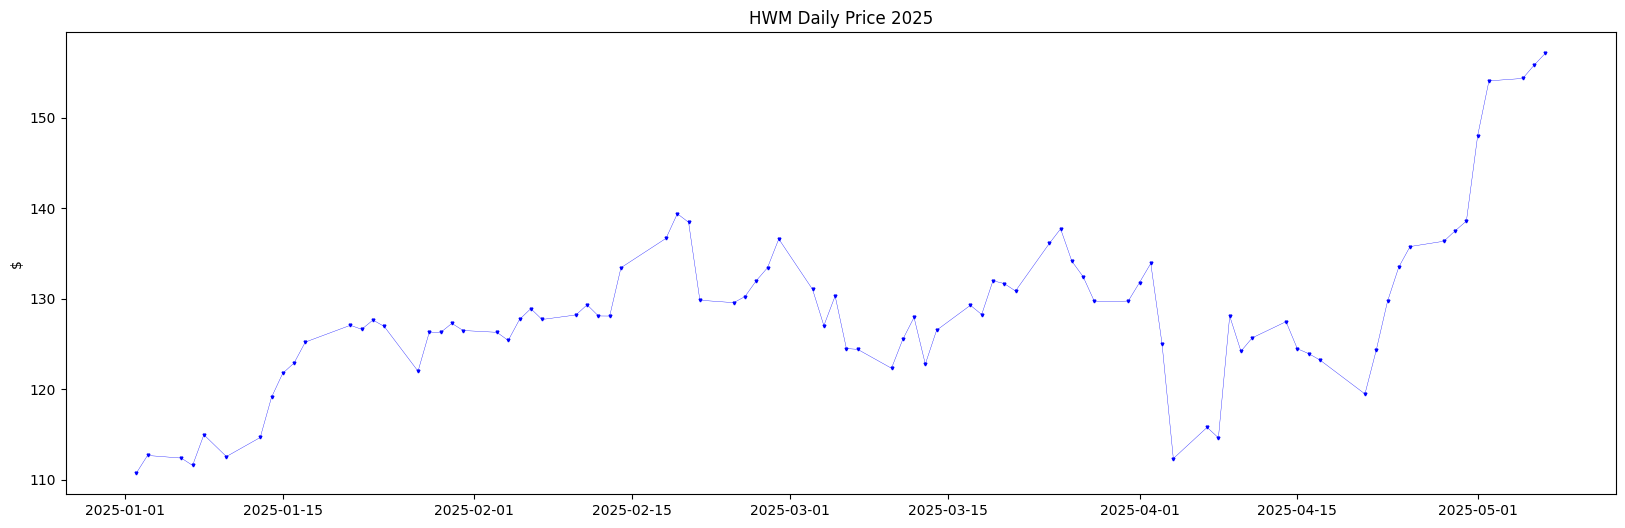

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(ticker["Date"], ticker["Price"], color='blue', marker='v', markersize=2, linestyle='-', linewidth=0.25)

plt.title(f"{user_input_stock_symbol} Daily Price 2025")

ax.set_ylabel("$")

Text(0, 0.5, '% Change')

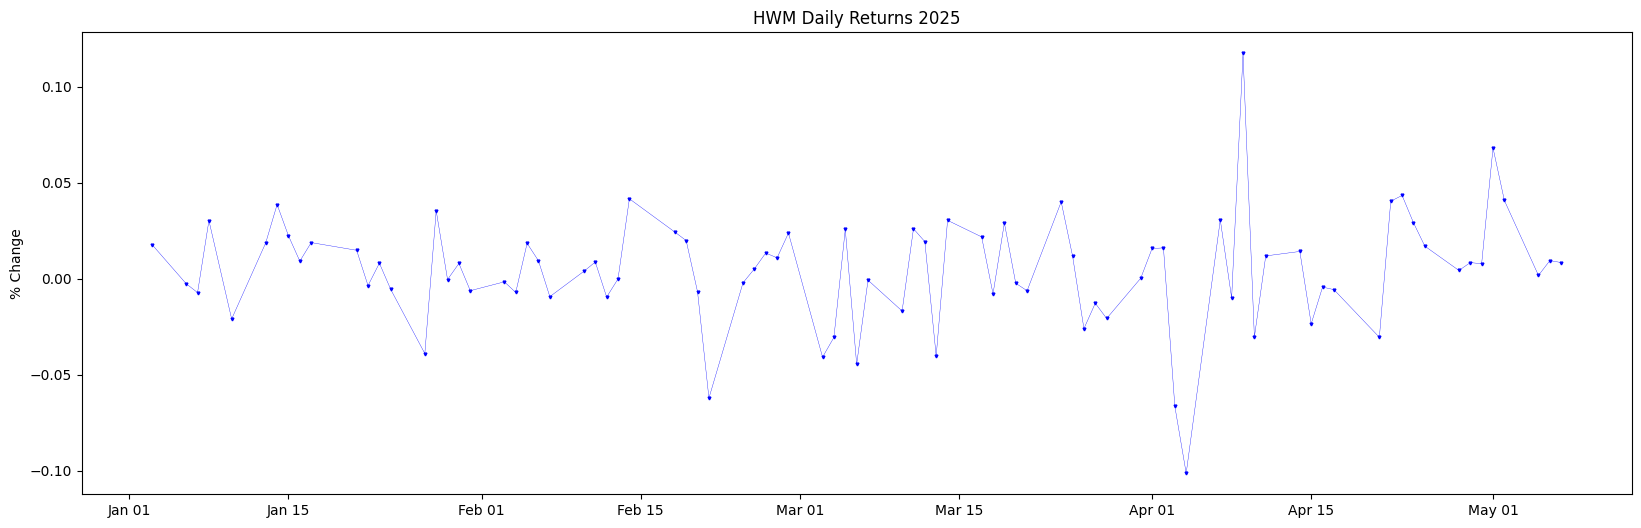

In [18]:
fig,ax = plt.subplots(figsize=(20, 6))

ax.plot(ticker["Date"], ticker["Returns"], color='blue', marker='v', markersize=2, linestyle='-', linewidth=0.25)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title(f"{user_input_stock_symbol} Daily Returns 2025")

ax.set_ylabel("% Change")

In [21]:
avg_daily_returns = pd.DataFrame(daily_returns.mean().sort_values(ascending=False))

avg_daily_returns.reset_index(inplace=True)

avg_daily_returns.columns = ["Ticker", "Avg Daily Return"]

avg_daily_returns_list = avg_daily_returns.head(10).values.tolist()

symbols_of_interest = pd.DataFrame(avg_daily_returns_list)

symbols_of_interest.set_index(0, inplace=True)

symbols_of_interest = symbols_of_interest.index.to_list()
    
symbols_of_interest

['PLTR', 'CVS', 'PM', 'HWM', 'NEM', 'VRSN', 'NRG', 'UBER', 'COR', 'MOS']

```python
benchmark_adj_close_true = benchmark_adj_close.drop(columns=["BTC-USD", "^TNX", "NG=F", "CL=F", "GC=F"])

sp500df['Adj Close'].head()
sp500df['High'].head()
sp500df['Low'].head()
sp500df['Close'].head()
sp500df['Volume'].head()
sp500df['Open'].head()
sp500df['Adj Close'].tail()
```
This code is disabled. The next cell looks at benchmarks.

In [ ]:
selected_benchmarks = ["SPY", "GC=F", "BTC-USD", "^TNX", "CL=F", "BZ=F", "000001.SS", "NG=F"]

benchmark_adj_close = yf.download(selected_benchmarks, start=start, end=end, auto_adjust=False)["Adj Close"].dropna()

benchmark_adj_close.head()

[*********************100%***********************]  8 of 8 completed


Ticker,000001.SS,BTC-USD,BZ=F,CL=F,GC=F,NG=F,SPY,^TNX
Date,,,,,,,,
2025-01-02,3262.561035,96886.875000,75.930000,73.129997,2658.899902,3.660,582.886597,4.575
2025-01-03,3211.429932,98107.429688,76.510002,73.959999,2645.000000,3.354,590.174622,4.596
2025-01-06,3206.923096,102078.085938,76.300003,73.559998,2638.399902,3.672,593.574402,4.618
2025-01-07,3229.644043,96922.703125,77.050003,74.250000,2656.699951,3.449,586.864624,4.683
2025-01-08,3230.167969,95043.523438,76.160004,73.320000,2664.500000,3.651,587.721985,4.693


In [ ]:
def market_with_btc():
    fig, ax = plt.subplots(figsize=(20, 6))
    for ticker in benchmark_adj_close.columns:
        ax.plot(
            benchmark_adj_close.index,
            benchmark_adj_close[ticker],
            label=ticker,
            marker='v',
            markersize=2,
            linestyle='-',
            linewidth=0.25
        )
    ax.legend(loc="upper left")
    return fig, ax

benchmark_adj_close_true = benchmark_adj_close.drop(columns=["BTC-USD",'^TNX','NG=F','CL=F','GC=F'])

This project uses 'SPY' and not 'VIX' but it is a fitting companion.

| Ticker      | Asset                    | Currency               |
| ----------- | ------------------------ | ---------------------- |
| `VIX`      | Volatility Index         | USD (implied %)        |
| `GC=F`      | Gold (COMEX Futures)     | USD per troy ounce     |
| `BTC-USD`   | Bitcoin                  | USD                    |
| `^TNX`      | 10-Year Treasury Yield   | % (rate, not a price)  |
| `CL=F`      | WTI Crude Oil Futures    | USD per barrel         |
| `BZ=F`      | Brent Crude Oil Futures  | USD per barrel         |
| `000001.SS` | Shanghai Composite Index | **CNY** (Chinese yuan) |
| `NG=F`      | Natural Gas Futures      | USD per MMBtu          |

(<Figure size 3000x1000 with 1 Axes>, <Axes: >)

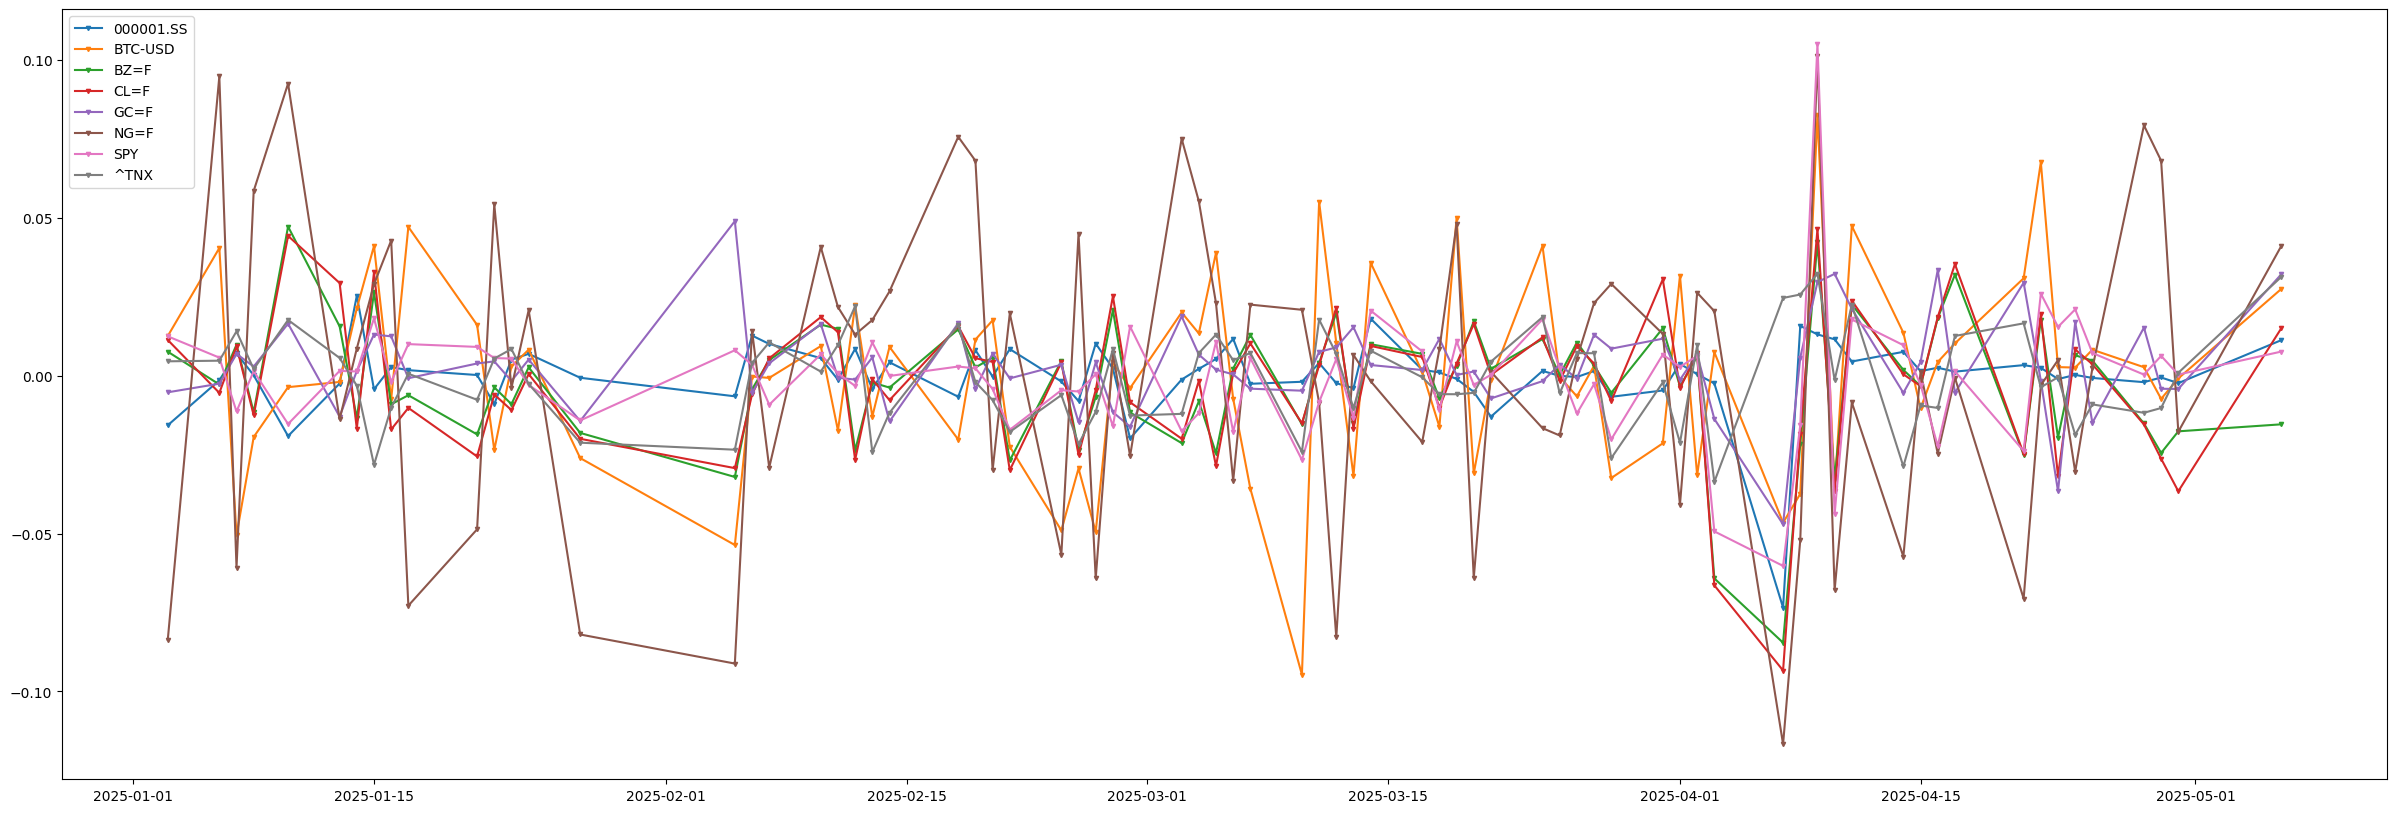

In [22]:
benchmark_adj_close_returns = benchmark_adj_close.pct_change()

def market_viewer():
    fig, ax = plt.subplots(figsize=(30, 10))
    for ticker in benchmark_adj_close_returns.columns:
        ax.plot(
            benchmark_adj_close_returns.index,
            benchmark_adj_close_returns[ticker],
            label=ticker,
            marker='v',
            markersize=3,
            linestyle='-',
            linewidth=1.5       )
    ax.legend(loc="upper left")
    return fig, ax

market_viewer()

In [25]:
benchmark_adj_close_returns.mean().sort_values(ascending=False)

# create df of fundamentals with .info i think from yf exoirt to csv

Ticker
GC=F         0.003479
BTC-USD      0.000459
NG=F         0.000416
000001.SS    0.000288
SPY         -0.000381
^TNX        -0.000704
BZ=F        -0.002491
CL=F        -0.002613
dtype: float64